<a href="https://colab.research.google.com/github/claredavies/MachineLearningCoursework/blob/main/Assignment2/MachineLearningAssignment2SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries and Data in

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Sentiment140.tenPercent.sample.tweets.tsv', sep='\t', delimiter=None, header='infer', names=None, index_col=None)

Saving Sentiment140.tenPercent.sample.tweets.tsv to Sentiment140.tenPercent.sample.tweets (1).tsv


# Data Exploration

Check Size of Data

In [5]:
print(data.head())
print(data.info())

   sentiment_label  \
0                4   
1                4   
2                0   
3                0   
4                0   

                                                                                                               tweet_text  
0                                   @elephantbird Hey dear, Happy Friday to You  Already had your rice's bowl for lunch ?  
1                                                              Ughhh layin downnnn    Waiting for zeina to cook breakfast  
2    @greeniebach I reckon he'll play, even if he's not 100%...but i know nothing!! ;) It won't be the same without him.   
3                                                                                   @vaLewee I know!  Saw it on the news!  
4  very sad that http://www.fabchannel.com/ has closed down. One of the few web services that I've used for over 5 years   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column  

Check if any missing values

In [6]:
print(data.isnull().values.any())

False


In [7]:
df = data.copy()
df.rename(columns = {'sentiment_label':'target'}, inplace = True)

print("Number of duplicates before dropping:  " + str(len(df[df.duplicated()])))

df.drop_duplicates(keep = False, inplace = True)
print("Number of duplicates after dropping:  " + str(len(df[df.duplicated()])))

Number of duplicates before dropping:  553
Number of duplicates after dropping:  0


Checking if data balanced

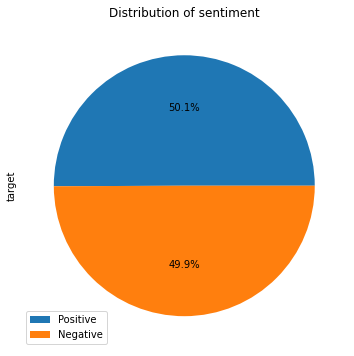

In [8]:
df['target'] = df['target'].replace(4,1)

df['target'].value_counts().plot.pie(figsize=(6,6),title="Distribution of sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

Creating word clouds...


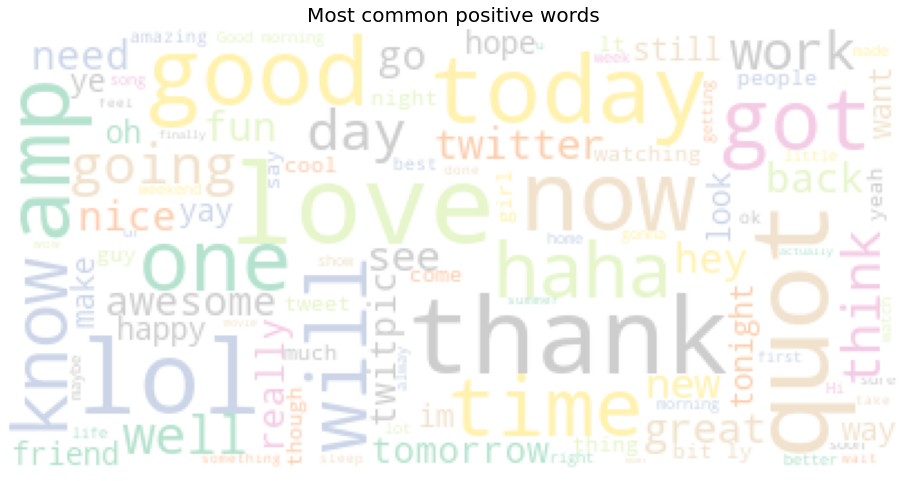

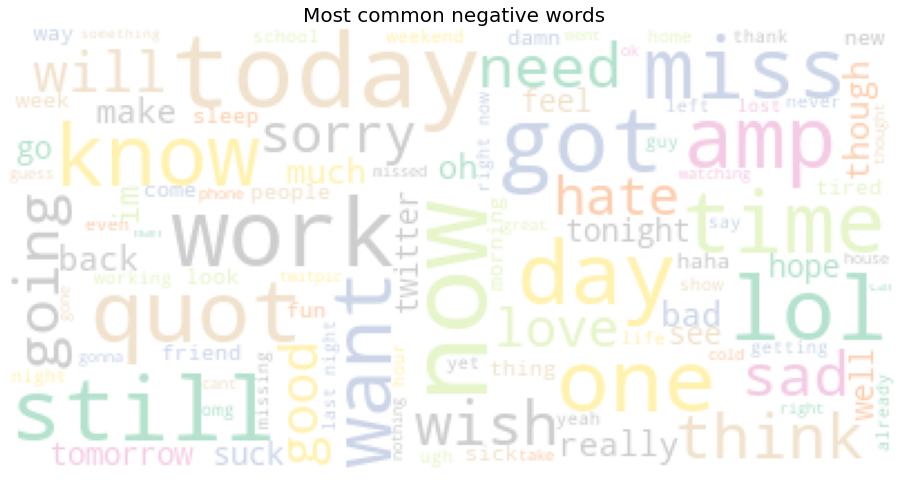

In [9]:
from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')

print("Creating word clouds...")
positive_words=" ".join(df[df.target==1]['tweet_text'].values)
negative_words=" ".join(df[df.target==0]['tweet_text'].values)

generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")


# Data Pre-processing

In [12]:
dataset = df.copy()

In [13]:
dataset['tweet_text']=dataset['tweet_text'].str.lower()
print(dataset['tweet_text'].head(30))

0                                                                    @elephantbird hey dear, happy friday to you  already had your rice's bowl for lunch ?
1                                                                                               ughhh layin downnnn    waiting for zeina to cook breakfast
2                                     @greeniebach i reckon he'll play, even if he's not 100%...but i know nothing!! ;) it won't be the same without him. 
3                                                                                                                    @valewee i know!  saw it on the news!
4                                   very sad that http://www.fabchannel.com/ has closed down. one of the few web services that i've used for over 5 years 
5                                                          @fearnecotton who sings 'i remember'? i alwaysss hear it on radio 1 but never catch the artist 
6                                                                     

Remove twitter handles

In [14]:
def remove_handles(text):
    return re.sub("@[A-Za-z0-9]+", r'', text)
dataset['tweet_text']= dataset['tweet_text'].apply(lambda x: remove_handles(x))
print(dataset['tweet_text'].head(30))

0                                                                         hey dear, happy friday to you  already had your rice's bowl for lunch ?
1                                                                                      ughhh layin downnnn    waiting for zeina to cook breakfast
2                                         i reckon he'll play, even if he's not 100%...but i know nothing!! ;) it won't be the same without him. 
3                                                                                                                    i know!  saw it on the news!
4                          very sad that http://www.fabchannel.com/ has closed down. one of the few web services that i've used for over 5 years 
5                                                               who sings 'i remember'? i alwaysss hear it on radio 1 but never catch the artist 
6                                                                                                   with god on ur side anyt

In [15]:
def cleaning_URLs(data):
    return re.sub('http\S+|www.\S+',' ',data)
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda x: cleaning_URLs(x))
print(dataset['tweet_text'].head(30))

0                                                                         hey dear, happy friday to you  already had your rice's bowl for lunch ?
1                                                                                      ughhh layin downnnn    waiting for zeina to cook breakfast
2                                         i reckon he'll play, even if he's not 100%...but i know nothing!! ;) it won't be the same without him. 
3                                                                                                                    i know!  saw it on the news!
4                                                   very sad that   has closed down. one of the few web services that i've used for over 5 years 
5                                                               who sings 'i remember'? i alwaysss hear it on radio 1 but never catch the artist 
6                                                                                                   with god on ur side anyt

In [16]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda x: cleaning_numbers(x))
print(dataset['tweet_text'].head(30))

0                                                                         hey dear, happy friday to you  already had your rice's bowl for lunch ?
1                                                                                      ughhh layin downnnn    waiting for zeina to cook breakfast
2                                            i reckon he'll play, even if he's not %...but i know nothing!! ;) it won't be the same without him. 
3                                                                                                                    i know!  saw it on the news!
4                                                    very sad that   has closed down. one of the few web services that i've used for over  years 
5                                                                who sings 'i remember'? i alwaysss hear it on radio  but never catch the artist 
6                                                                                                   with god on ur side anyt

Creating word clouds...


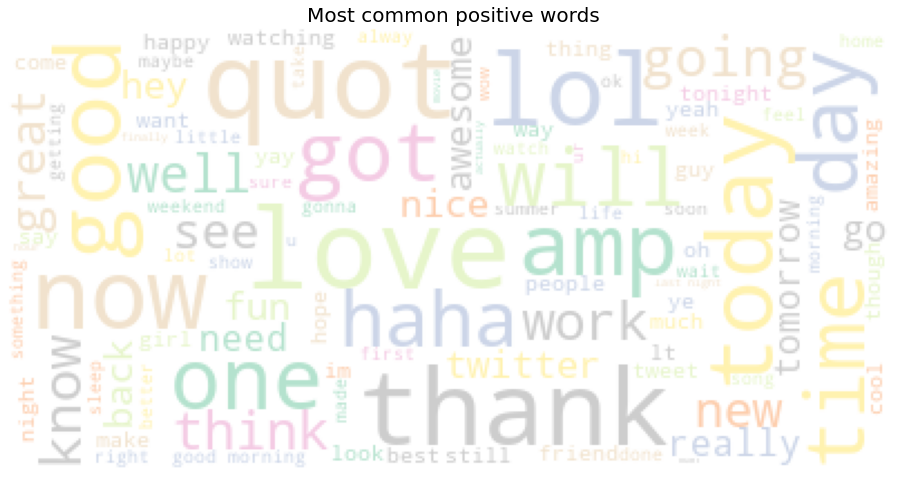

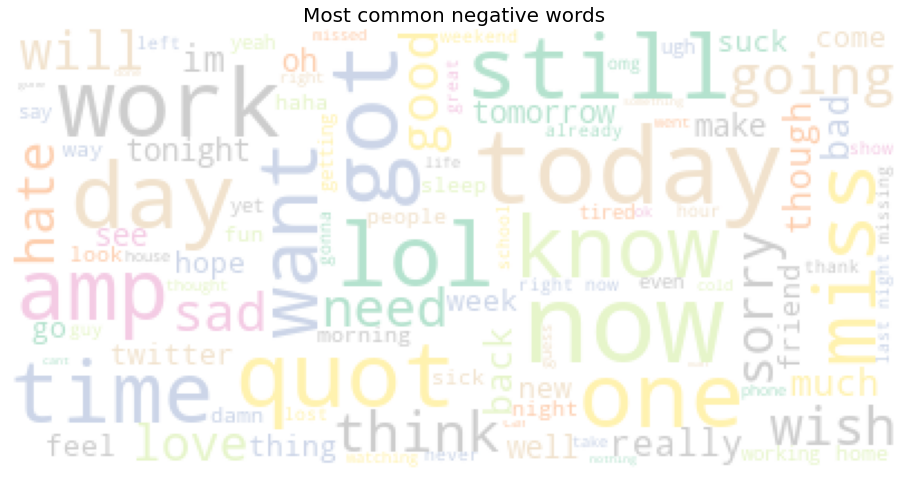

In [17]:
print("Creating word clouds...")
positive_words=" ".join(dataset[dataset.target==1]['tweet_text'].values)
negative_words=" ".join(dataset[dataset.target==0]['tweet_text'].values)

generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")

In [18]:
stopwordlist = ['a','and','quot','amp']

In [19]:
STOPWORDS = stopwordlist

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda text: cleaning_stopwords(text))
print(dataset['tweet_text'].head(10))

0                                                                hey dear, happy friday to you already had your rice's bowl for lunch ?
1                                                                               ughhh layin downnnn waiting for zeina to cook breakfast
2                                   i reckon he'll play, even if he's not %...but i know nothing!! ;) it won't be the same without him.
3                                                                                                           i know! saw it on the news!
4                                              very sad that has closed down. one of the few web services that i've used for over years
5                                                        who sings 'i remember'? i alwaysss hear it on radio but never catch the artist
6                                                                                          with god on ur side anything is possible....
7                                               

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize 

dataset['tweet_text'] = dataset['tweet_text'].apply(word_tokenize)
print(dataset['tweet_text'].head(10))

0                                                                           [hey, dear, ,, happy, friday, to, you, already, had, your, rice, 's, bowl, for, lunch, ?]
1                                                                                                   [ughhh, layin, downnnn, waiting, for, zeina, to, cook, breakfast]
2                        [i, reckon, he, 'll, play, ,, even, if, he, 's, not, %, ..., but, i, know, nothing, !, !, ;, ), it, wo, n't, be, the, same, without, him, .]
3                                                                                                                             [i, know, !, saw, it, on, the, news, !]
4                                                     [very, sad, that, has, closed, down, ., one, of, the, few, web, services, that, i, 've, used, for, over, years]
5                                                                  [who, sings, 'i, remember, ', ?, i, alwaysss, hear, it, on, radio, but, never, catch, the, artist]
6   

In [21]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['tweet_text']= dataset['tweet_text'].apply(lambda x: stemming_on_text(x))
print(dataset['tweet_text'].head(10))

0                                                                           [hey, dear, ,, happy, friday, to, you, already, had, your, rice, 's, bowl, for, lunch, ?]
1                                                                                                   [ughhh, layin, downnnn, waiting, for, zeina, to, cook, breakfast]
2                        [i, reckon, he, 'll, play, ,, even, if, he, 's, not, %, ..., but, i, know, nothing, !, !, ;, ), it, wo, n't, be, the, same, without, him, .]
3                                                                                                                             [i, know, !, saw, it, on, the, news, !]
4                                                     [very, sad, that, has, closed, down, ., one, of, the, few, web, services, that, i, 've, used, for, over, years]
5                                                                  [who, sings, 'i, remember, ', ?, i, alwaysss, hear, it, on, radio, but, never, catch, the, artist]
6   

In [22]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet_text'] = dataset['tweet_text'].apply(lambda x: lemmatizer_on_text(x))
print(dataset['tweet_text'].head(10))

0                                                                           [hey, dear, ,, happy, friday, to, you, already, had, your, rice, 's, bowl, for, lunch, ?]
1                                                                                                   [ughhh, layin, downnnn, waiting, for, zeina, to, cook, breakfast]
2                        [i, reckon, he, 'll, play, ,, even, if, he, 's, not, %, ..., but, i, know, nothing, !, !, ;, ), it, wo, n't, be, the, same, without, him, .]
3                                                                                                                             [i, know, !, saw, it, on, the, news, !]
4                                                     [very, sad, that, has, closed, down, ., one, of, the, few, web, services, that, i, 've, used, for, over, years]
5                                                                  [who, sings, 'i, remember, ', ?, i, alwaysss, hear, it, on, radio, but, never, catch, the, artist]
6   

In [23]:
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
detokenizer = Detok()

dataset['tweet_text_untokenised'] = dataset.tweet_text.apply(lambda row: detokenizer.detokenize(row))
print(dataset['tweet_text_untokenised'].head(10))

0                                                                 hey dear, happy friday to you already had your rice's bowl for lunch?
1                                                                               ughhh layin downnnn waiting for zeina to cook breakfast
2                                    i reckon he'll play, even if he's not%...but i know nothing!! ;) it won't be the same without him.
3                                                                                                           i know! saw it on the news!
4                                             very sad that has closed down . one of the few web services that i've used for over years
5                                                        who sings 'i remember'? i alwaysss hear it on radio but never catch the artist
6                                                                                          with god on ur side anything is possible....
7                                               

# Machine Learning

In [24]:
X=dataset.tweet_text_untokenised
y=dataset.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =0)

Turn Sentences into numerica data

In [26]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=700000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  639012


In [27]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [67]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['BernoulliNB'] = BernoulliNB(alpha=1)
models['Logistic Regression'] = LogisticRegression(C = 1,solver ='sag')

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall, predictions = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    # Prediction 
    predictions[key] = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions[key], y_test)
    precision[key] = precision_score(predictions[key], y_test)
    recall[key] = recall_score(predictions[key], y_test)

# Evaluation

Show Accuracy, Precision & Recall

                     Accuracy  Precision    Recall
BernoulliNB          0.782393   0.808752  0.770794
Logistic Regression  0.798228   0.790799  0.805358


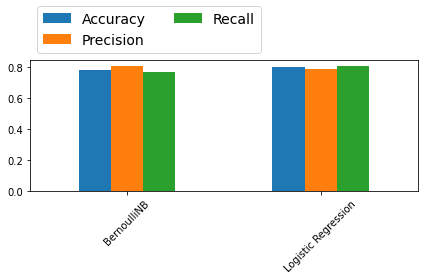

In [69]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

print(df_model)

ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

Plot Correlation Matrices

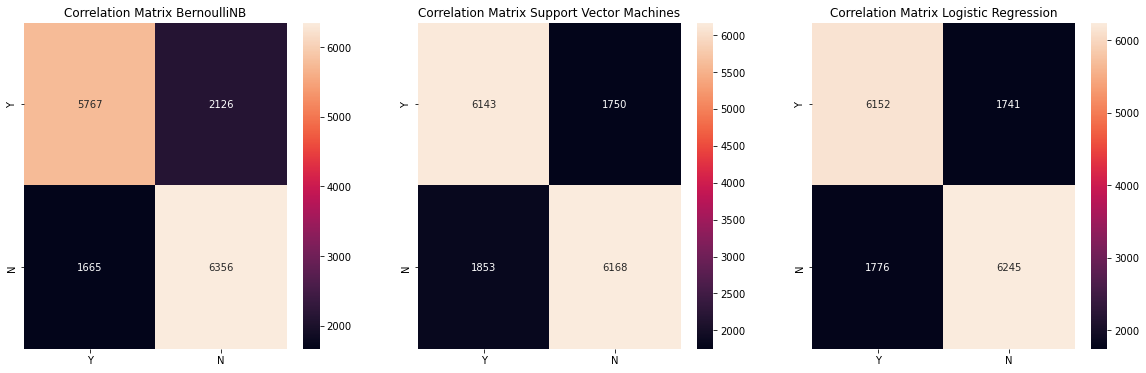

In [ ]:
from sklearn.metrics import confusion_matrix

def get_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  return cm

def plot_cm(ax,labels, predictions,title, p=0.5):
  tick_labels = ['Y', 'N']
  cm = get_cm(labels, predictions, p)
  sns.heatmap(cm, annot=True, fmt="d",ax=ax)
  ax.title.set_text(title)
  ax.set_xticklabels(tick_labels)
  ax.set_yticklabels(tick_labels)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,6))
plot_cm(ax1,y_test, predictions['BernoulliNB'],"Correlation Matrix BernoulliNB")
plot_cm(ax3,y_test, predictions['Logistic Regression'],"Correlation Matrix Logistic Regression")

Plot ROC Curves

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(ax,labels, predictions,title):
  fpr, tpr, thresholds = roc_curve(labels, predictions)
  roc_auc = auc(fpr, tpr)
  ax.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.legend(loc="lower right")
  ax.title.set_text(title)

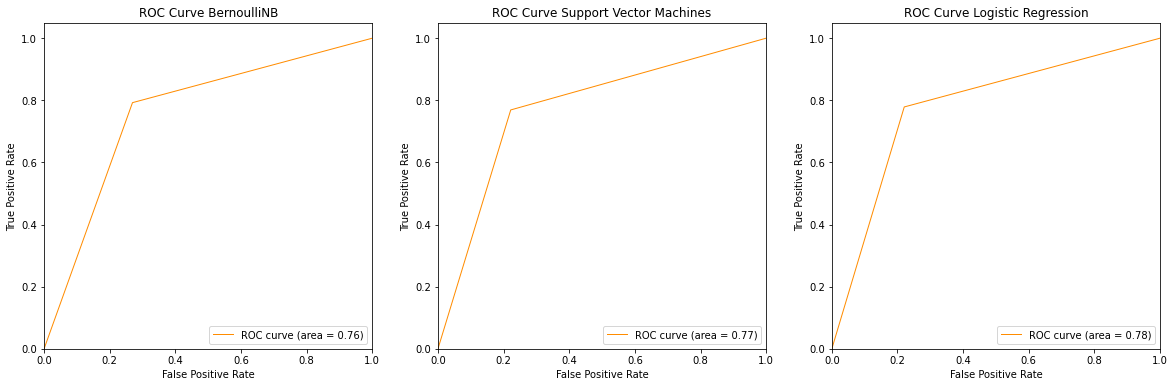

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,6))
plot_roc_curve(ax1, y_test, predictions['BernoulliNB'],"ROC Curve BernoulliNB")
plot_roc_curve(ax3, y_test, predictions['Logistic Regression'],"ROC Curve Logistic Regression")

# Hyper-Parameter Tuning

In [64]:
logistic = LogisticRegression()
print(logistic.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [66]:
from sklearn.model_selection import GridSearchCV

C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
solver = ['liblinear', 'saga',"sag"]
hyperparameters = dict(C=C, solver=solver)

logistic = LogisticRegression()

gridsearch = GridSearchCV(estimator=logistic, param_grid=hyperparameters,verbose=True)
best_model_grid_search = gridsearch.fit(X_train, y_train)
print(best_model_grid_search.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
LogisticRegression(C=1, solver='sag')


In [53]:
print(bernoulliNB.get_params().keys())

dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior'])


In [59]:
from sklearn.model_selection import GridSearchCV

alpha = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyperparameters = dict(alpha = alpha)

bernoulliNB = BernoulliNB()

gridsearch = GridSearchCV(estimator=bernoulliNB, param_grid=hyperparameters,verbose=True)
best_model_grid_search = gridsearch.fit(X_train, y_train)
print(best_model_grid_search.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
BernoulliNB(alpha=1)
